In [ ]:

import graphviz
def draw_dot(root):
    """Visualizes a computation graph starting from the given root node."""
    dot = graphviz.Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    
    build(root)
    
    for n in nodes:
        dot.node(name=str(id(n)), label=f"{n.data:.4f} | grad: {n.grad:.4f}", shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot


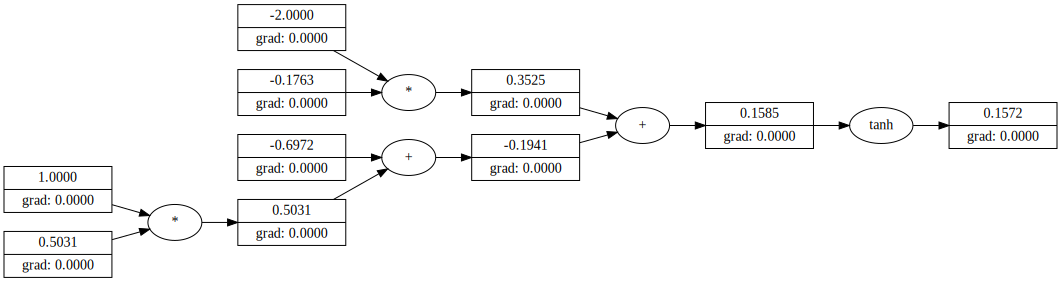

In [18]:
dot

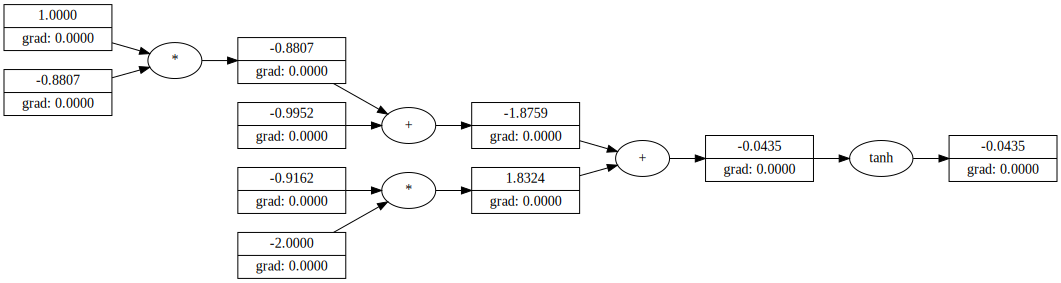

In [20]:
from nanograd import nn
from nanograd.engine import Value

n = nn.Neuron(2)
x = [Value(1.0), Value(-2.0)]
y = n(x)
dot = draw_dot(y)
dot